In [114]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import pingouin as pg

In [76]:
raw = pd.read_csv('/Users/ethan/Documents/GitHub/OpenSesame/Response_time_timing/rt_timing_pilot_2.csv')

In [109]:
df = pd.DataFrame({'condition' : raw.condition,
                 'rt' : raw.response_time,
                  'color': raw.color,
                  'id': raw.jatosStudyResultId})
df_means = df.groupby(['id', 'condition']).mean().reset_index()

<ipython-input-109-eca674e33045>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_means = df.groupby(['id', 'condition']).mean().reset_index()


<AxesSubplot:xlabel='rt', ylabel='condition'>

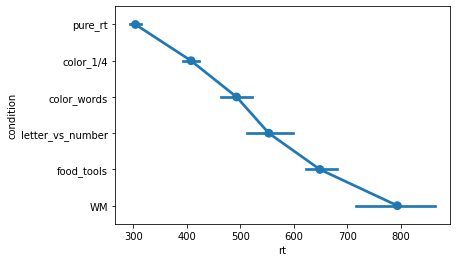

In [110]:
sns.pointplot(data = df, y = 'condition', x = 'rt')

In [111]:
set(df['condition'])

{'WM', 'color_1/4', 'color_words', 'food_tools', 'letter_vs_number', 'pure_rt'}

(0.0, 1000.0)

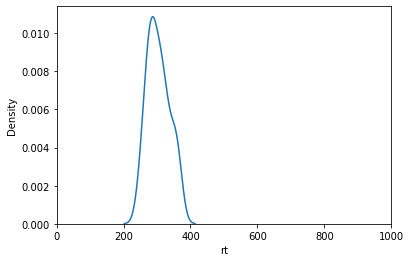

In [112]:
# Show distribution of pure_rt

data = df.loc[df['condition'] == 'pure_rt'] 
ax = sns.kdeplot(data = data, x = 'rt')
ax.set_xlim(0,1000)

(0.0, 1000.0)

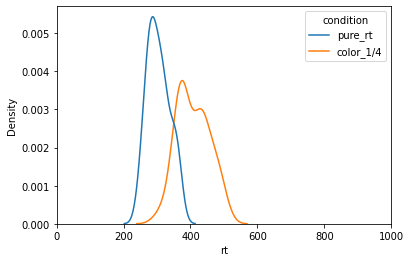

In [113]:
# show pure rt and simple binary color categorization task (color 1/4)

data = df.loc[(df['condition'] == 'pure_rt')|(df['condition'] == 'color_1/4')]

ax = sns.kdeplot(data = data, x = 'rt', hue = 'condition')
ax.set_xlim(0,1000)

In [117]:
# t-test with too many degrees of freedom

pure_rt = df.loc[df['condition'] == 'pure_rt']['rt']
binary_choice = df.loc[df['condition'] == 'color_1/4']['rt']

pg.ttest(pure_rt, binary_choice, paired = True)


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-12.208276,39,two-sided,6.747705e-15,"[-121.06, -86.64]",2.555547,1.006e+12,1.0


In [140]:
# t-test with the correct number of degrees of freedom

pure_rt = df_means.loc[df_means['condition'] == 'pure_rt']['rt']
binary_choice = df_means.loc[df_means['condition'] == 'color_1/4']['rt']

pg.ttest(binary_choice,pure_rt, paired = True)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,12.075581,1,two-sided,0.0526,"[-5.42, 213.12]",5.457443,2.349,0.455184


In [ ]:
#t-value: (mean1 - mean2) / variance

In [ ]:
# df: N-1

In [145]:
# CI: confidence interval of the difference of the means
diff = (binary_choice.mean() - pure_rt.mean()).round(2)
diff

103.85

In [146]:
# cohen-d: effect size
# mean difference / standard deviation of difference


In [ ]:
# BF10: bayes factor (H1 / H0)
# how many times more likely is H1 than H2?

In [147]:
# power: probability that we will detect an effect if there is one